Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Create Example Employee Dataset

In [2]:
data = {
    "EmployeeID": range(1, 21),
    "Department": ["HR", "Finance", "IT", "Sales"] * 5,
    "Experience": [1, 3, 5, 7, 2, 4, 6, 8, 10, 12,
                   1, 2, 3, 4, 5, 6, 8, 10, 12, 15],
    "Salary": [25000, 40000, 55000, 70000, 30000,
               45000, 60000, 80000, 95000, 120000,
               28000, 38000, 48000, 52000, 58000,
               64000, 75000, 85000, 110000, 130000],
    "PerformanceScore": [2, 3, 4, 5, 2, 3, 4, 5, 4, 5,
                         2, 3, 3, 4, 4, 5, 4, 5, 5, 5]
}
df = pd.DataFrame(data)
print("Dataset Preview:\n", df.head())

Dataset Preview:
    EmployeeID Department  Experience  Salary  PerformanceScore
0           1         HR           1   25000                 2
1           2    Finance           3   40000                 3
2           3         IT           5   55000                 4
3           4      Sales           7   70000                 5
4           5         HR           2   30000                 2


Salary Distribution (Histogram)

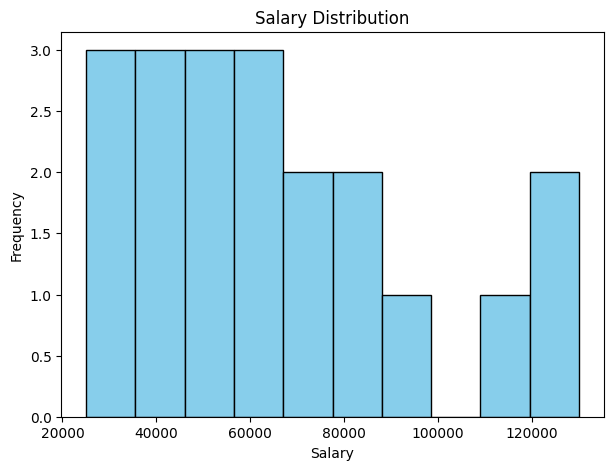

In [3]:
df['Salary'].plot(kind='hist', bins=10, edgecolor='black', color='skyblue', figsize=(7,5))
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.savefig("salary_distribution.png")  
plt.show()

Department-wise Salary Bar Chart

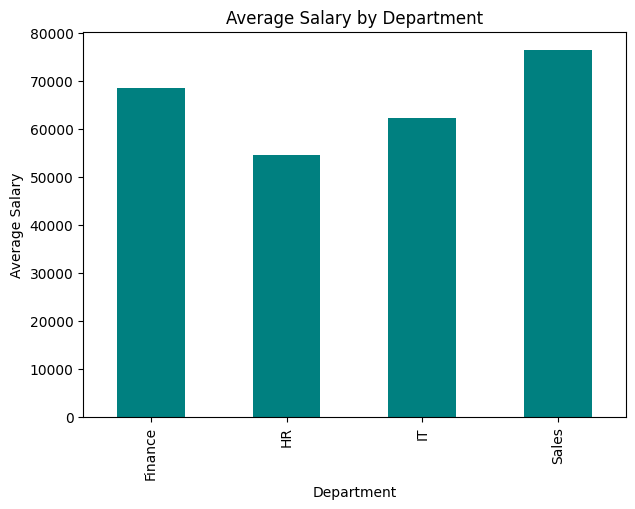

In [4]:
dept_salary = df.groupby("Department")['Salary'].mean()
dept_salary.plot(kind='bar', color='teal', figsize=(7,5))
plt.title("Average Salary by Department")
plt.ylabel("Average Salary")
plt.show()

Experience vs Salary Scatter Plot

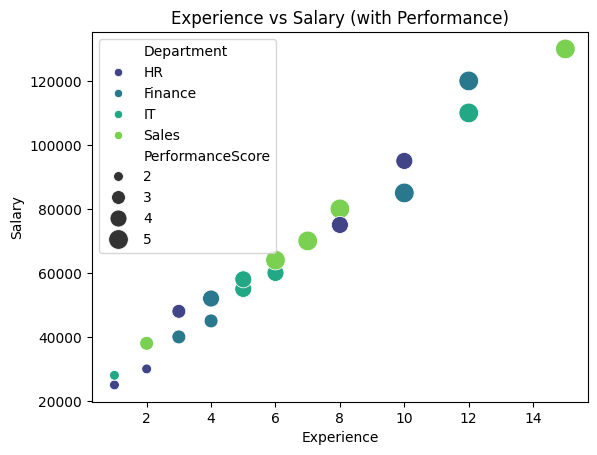

In [5]:
sns.scatterplot(data=df, x="Experience", y="Salary", hue="Department", size="PerformanceScore", palette="viridis", sizes=(50,200))
plt.title("Experience vs Salary (with Performance)")
plt.show()

Box Plot for Salary Comparison

C:\Users\priya\AppData\Local\Temp\ipykernel_1456\1025996211.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Department", y="Salary", palette="Set2")


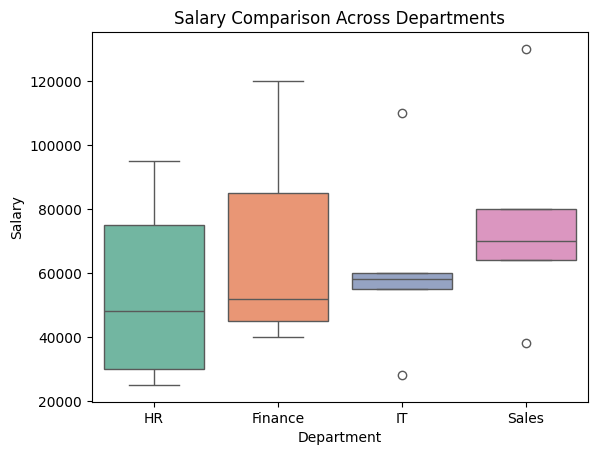

In [6]:
sns.boxplot(data=df, x="Department", y="Salary", palette="Set2")
plt.title("Salary Comparison Across Departments")
plt.show()

Pairplot for Performance Analysis

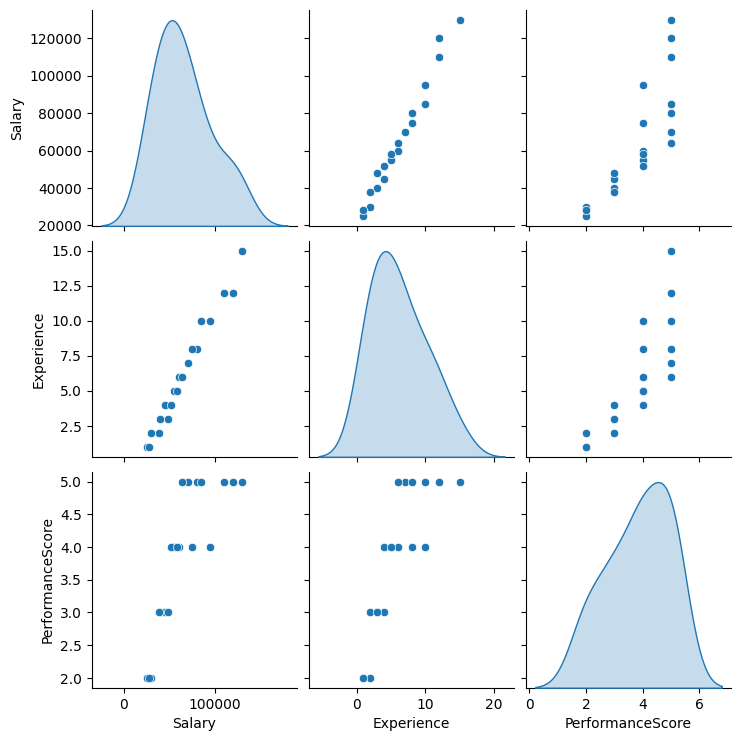

In [7]:
sns.pairplot(df[['Salary','Experience','PerformanceScore']], diag_kind='kde')
plt.show()

 Heatmap for Correlation

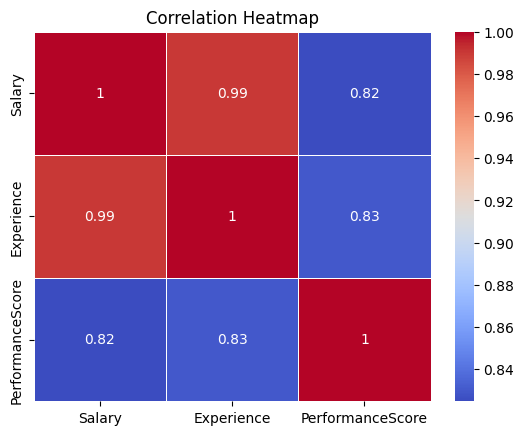

In [8]:
corr = df[['Salary','Experience','PerformanceScore']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Customized Scatter Plot

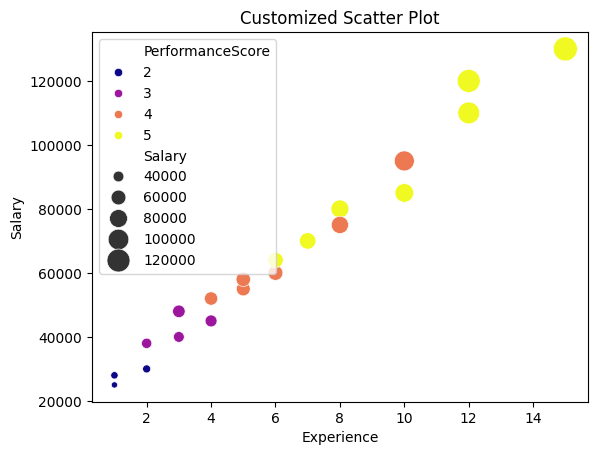

In [9]:
sns.scatterplot(data=df, x="Experience", y="Salary", 
                hue="PerformanceScore", size="Salary", 
                sizes=(20,300), palette="plasma")
plt.title("Customized Scatter Plot")
plt.show()

Subplot Layout with Multiple Visualizations

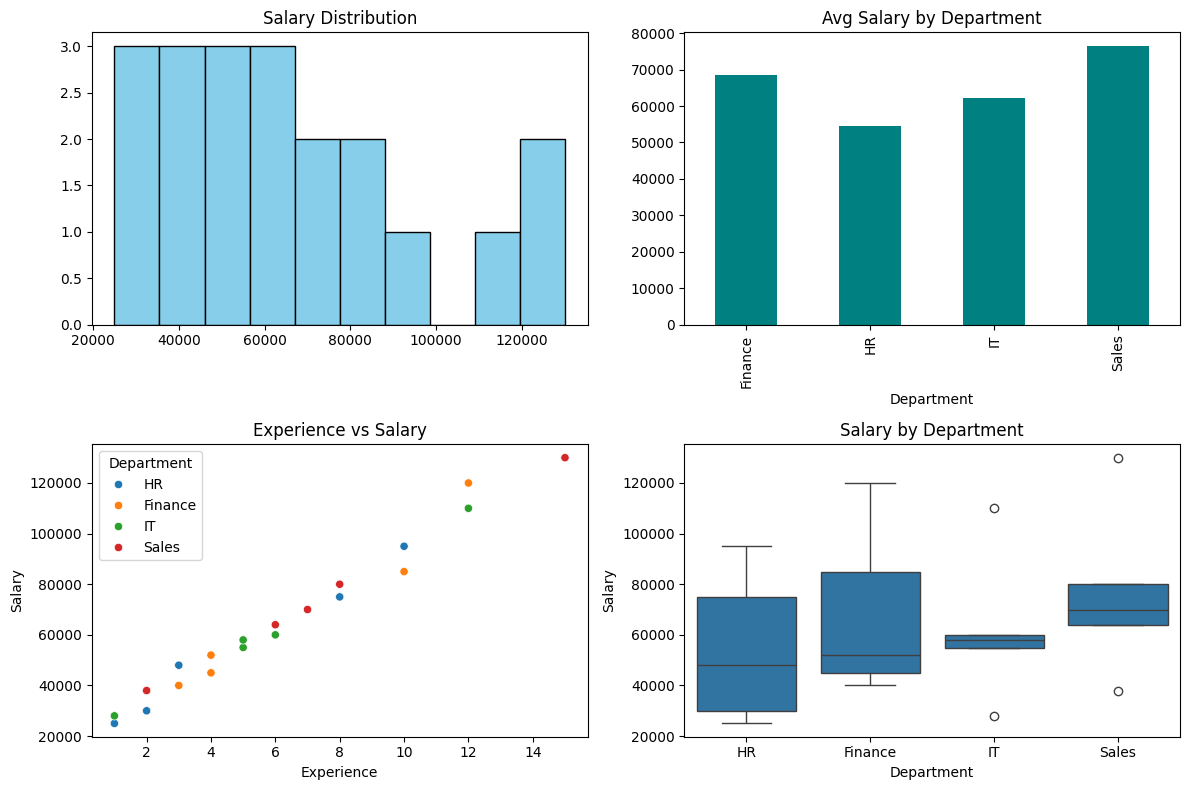

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))

# Histogram
axs[0,0].hist(df['Salary'], bins=10, color="skyblue", edgecolor="black")
axs[0,0].set_title("Salary Distribution")

# Bar Chart
dept_salary.plot(kind="bar", ax=axs[0,1], color="teal")
axs[0,1].set_title("Avg Salary by Department")

# Scatter Plot
sns.scatterplot(data=df, x="Experience", y="Salary", hue="Department", ax=axs[1,0])
axs[1,0].set_title("Experience vs Salary")

# Box Plot
sns.boxplot(data=df, x="Department", y="Salary", ax=axs[1,1])
axs[1,1].set_title("Salary by Department")

plt.tight_layout()
plt.savefig("employee_dashboard.png")
plt.savefig("employee_dashboard.pdf")  
plt.show()

Summary Report

In [11]:
print("\nSummary Report")
print("-----------------")
print(f"Average Salary: {df['Salary'].mean():.2f}")
print(f"Highest Salary: {df['Salary'].max()} (Dept: {df.loc[df['Salary'].idxmax(),'Department']})")
print(f"Lowest Salary: {df['Salary'].min()} (Dept: {df.loc[df['Salary'].idxmin(),'Department']})")

print("\nInsights:")
print("- Salary distribution is right-skewed: more employees earn between 30k–70k.")
print("- Experience shows a strong positive correlation with Salary.")
print("- Performance score also increases with salary, though less strongly than experience.")
print("- IT and Sales departments have higher average salaries compared to HR and Finance.")


Summary Report
-----------------
Average Salary: 65400.00
Highest Salary: 130000 (Dept: Sales)
Lowest Salary: 25000 (Dept: HR)

Insights:
- Salary distribution is right-skewed: more employees earn between 30k–70k.
- Experience shows a strong positive correlation with Salary.
- Performance score also increases with salary, though less strongly than experience.
- IT and Sales departments have higher average salaries compared to HR and Finance.
